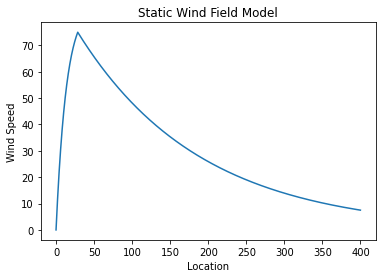

Text(0.5, 1.0, 'Static Wind Field Model without Lat & Long')

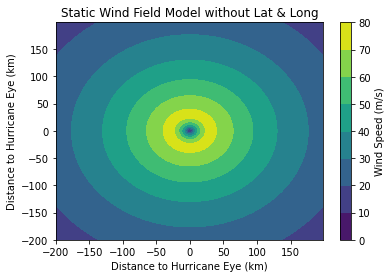

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# radius of maximum wind (km)
rmw = 28.5
# maximum sustained wind (m/s)
wm = 75
# radius of smallest wind (km)
rs = 400
B = 10
K = 1.14

Ξ = K * wm
Ψ = 1/(rmw)*math.log(K/(K-1))

def static_wind_field(x):
  global rmw
  global wm
  global rs
  global B
  global K
  global Ξ
  global Ψ

  wind_field = []
  for num in x:
    if (num >= 0 and num < rmw):
      value = Ξ*(1 - math.exp(-1*Ψ*num))
      wind_field.append(value)
    elif (num >= rmw and num <= rs):
      value = wm*math.exp(-1*(math.log(B)/(rs-rmw))*(num-rmw))
      wind_field.append(value)
    else:
      wind_field.append(0.0)
  
  return wind_field

x = np.arange(0,400,0.1)
static_wind_field = static_wind_field(x)

plt.figure(0)
plt.plot(x,static_wind_field)
plt.xlabel('Location')
plt.ylabel('Wind Speed')
plt.title('Static Wind Field Model')
plt.show()


x = np.arange(-200,200,1)

def static_wind_field(x1,x2):
  global rmw
  global wm
  global rs
  global B
  global K
  global Ξ
  global Ψ

  radius = np.sqrt(x1**2+x2**2)
  result = np.piecewise(radius, [(radius >= 0) & (radius < rmw), (radius >= rmw) & (radius <= rs), radius > rs], [lambda radius: (Ξ*(1 - np.exp(-1*Ψ*radius))), lambda radius: wm*np.exp(-1*(np.log(B)/(rs-rmw))*(radius-rmw)),lambda radius: 0])

  return result

plt.figure(1)
x1, x2 = np.meshgrid(x, x)
result = static_wind_field(x1,x2)
plt.contourf(x1,x2,result)
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('Distance to Hurricane Eye (km)')
plt.ylabel('Distance to Hurricane Eye (km)')
plt.title('Static Wind Field Model without Lat & Long')